In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))

import os
import h5py
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from typing import List, Dict, Union, Tuple, Optional
from pathlib import Path

from Data.data_class import plot_electron_spectrogram
from data_loader import MagnetotailDataset
from autoencoder import ConvAutoencoder, Autoencoder

In [2]:
file_path = Path('..') / "Data" / "training_data" / "test.h5"
abs_file_path = file_path.resolve()

# Create dataset
dataset = MagnetotailDataset(abs_file_path)


In [3]:
# Create a list of cutoff times for training
initial_cutoff_list = ['2011-08-14 22:50:00', 
                       '2011-11-12 05:40:00',
                       '2011-11-13 01:00:00',
                       '2011-11-13 22:00:00',
                       '2011-08-17 08:00:00',
                       '2011-08-16 01:10:00',
                       '2011-09-13 17:00:00',
                       '2011-09-14 13:15:00',
                       '2011-09-14 23:00:00',
                       '2012-02-09 11:00:00',
                       '2012-05-03 23:00:00', 
                       '2012-11-30 10:30:00',
                       ]
final_cutoff_list = ['2011-08-15 18:30:00',
                     '2011-11-12 06:40:00',
                     '2011-11-13 04:30:00',
                     '2011-11-13 23:30:00',
                     '2011-08-17 09:00:00',
                     '2011-08-16 02:30:00',
                     '2011-09-13 21:00:00',
                     '2011-09-14 14:15:00',
                     '2011-09-15 00:30:00',
                     '2012-02-09 14:00:00',
                     '2012-05-04 07:00:00',
                     '2012-11-30 12:00:00',
                     ]


# Assing the trainable times to the dataset
dataset.exclude_time_ranges(initial_cutoffs=initial_cutoff_list,
                           final_cutoffs=final_cutoff_list
                           )


In [4]:
train_samples = dataset.get_trainable_samples()

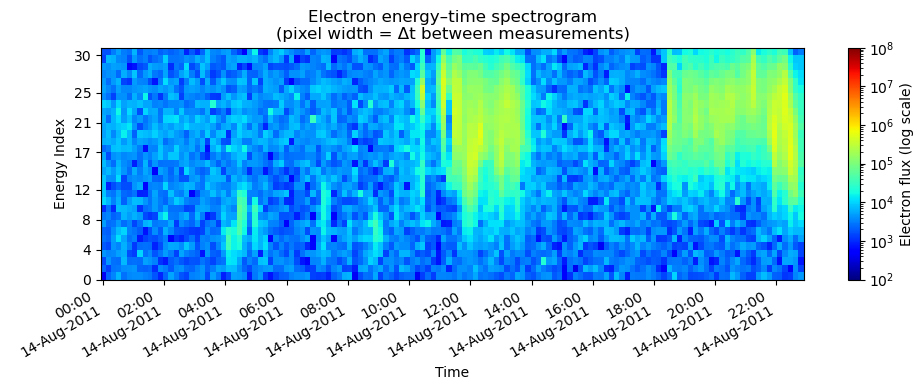

KeyboardInterrupt: Interrupted by user

In [5]:
dataset.set_regions_for_sections()

In [11]:
train_samples = dataset.get_trainable_samples()

In [12]:
for session in train_samples.keys():
    print(f"Session region: {train_samples[session]['region']}")

Session region: magnetotail
Session region: magnetosheath
Session region: magnetotail
Session region: magnetotail
Session region: magnetosheath
Session region: magnetosheath
Session region: magnetosheath
Session region: magnetosheath
Session region: magnetosheath
Session region: magnetotail
Session region: magnetotail
Session region: magnetosheath
Session region: magnetosheath
Session region: magnetotail
Session region: magnetosheath
Session region: magnetosheath
Session region: magnetotail
Session region: magnetotail
Session region: magnetotail
Session region: magnetosheath


In [13]:
train_samples['section_000'].keys()

dict_keys(['session_id', 'B_electron_avgtemp', 'B_electron_density', 'B_electron_eflux', 'B_electron_velocity_gsm', 'B_electron_vthermal', 'B_ion_avgtemp', 'B_ion_density', 'B_ion_eflux', 'B_ion_velocity_gsm', 'B_ion_vthermal', 'B_magnetic_field_gsm', 'times', 'region'])

In [14]:
train_samples['section_000'].keys()

dict_keys(['session_id', 'B_electron_avgtemp', 'B_electron_density', 'B_electron_eflux', 'B_electron_velocity_gsm', 'B_electron_vthermal', 'B_ion_avgtemp', 'B_ion_density', 'B_ion_eflux', 'B_ion_velocity_gsm', 'B_ion_vthermal', 'B_magnetic_field_gsm', 'times', 'region'])

In [15]:
train_samples.keys()

dict_keys(['section_000', 'section_001', 'section_002', 'section_003', 'section_004', 'section_005', 'section_006', 'section_007', 'section_008', 'section_009', 'section_010', 'section_011', 'section_012', 'section_013', 'section_014', 'section_015', 'section_016', 'section_017', 'section_018', 'section_019'])

In [16]:
import torch.nn as nn
import torch.optim as optim

# Prepare the training data using trainable indices and 'B_ion_eflux'
trainable_data = dataset.get_trainable_samples()

# Define how many time steps to use for the input
timestamps = 3

# Initialize the autoencoder
autoencoder = ConvAutoencoder(hidden_layer_1=12, hidden_layer_2=24, hidden_layer_3=24,  latent_dim=24, timestamps=timestamps)

In [17]:
trainable_data.keys()

dict_keys(['section_000', 'section_001', 'section_002', 'section_003', 'section_004', 'section_005', 'section_006', 'section_007', 'section_008', 'section_009', 'section_010', 'section_011', 'section_012', 'section_013', 'section_014', 'section_015', 'section_016', 'section_017', 'section_018', 'section_019'])

In [18]:
# Prepare the data for training
train_data, test_data = autoencoder.prepare_data(trainable_data, 'B_ion_eflux', averaging=False)

In [321]:
autoencoder = autoencoder.fit(train_data, test_data, epochs=100, batch_size=64, lr=0.001)

Epoch [5/100], Loss: 0.0300, Test Loss: 0.0277
Epoch [10/100], Loss: 0.0207, Test Loss: 0.0200
Epoch [15/100], Loss: 0.0176, Test Loss: 0.0172
Epoch [20/100], Loss: 0.0163, Test Loss: 0.0159
Epoch [25/100], Loss: 0.0152, Test Loss: 0.0153
Epoch [30/100], Loss: 0.0145, Test Loss: 0.0149
Epoch [35/100], Loss: 0.0141, Test Loss: 0.0146
Epoch [40/100], Loss: 0.0140, Test Loss: 0.0146
Epoch [45/100], Loss: 0.0134, Test Loss: 0.0138
Epoch [50/100], Loss: 0.0132, Test Loss: 0.0136
Epoch [55/100], Loss: 0.0137, Test Loss: 0.0139
Epoch [60/100], Loss: 0.0130, Test Loss: 0.0142
Epoch [65/100], Loss: 0.0131, Test Loss: 0.0134
Epoch [70/100], Loss: 0.0131, Test Loss: 0.0144
Epoch [75/100], Loss: 0.0124, Test Loss: 0.0135
Epoch [80/100], Loss: 0.0125, Test Loss: 0.0141
Epoch [85/100], Loss: 0.0123, Test Loss: 0.0135
Epoch [90/100], Loss: 0.0125, Test Loss: 0.0135
Epoch [95/100], Loss: 0.0122, Test Loss: 0.0136
Epoch [100/100], Loss: 0.0120, Test Loss: 0.0138


*Testing*

In [322]:
file_path = Path('..') / "Data" / "testing_data" / "test.h5"
abs_file_path = file_path.resolve()

# Create dataset
testing_dataset = MagnetotailDataset(abs_file_path)


In [323]:
testing_data_full = testing_dataset.get_trainable_samples()

# Prepare the data for testing
testing_data, testing_data_dict = autoencoder.prepare_data(testing_data_full, mode='test', averaging=False)

In [324]:
print(testing_data_dict['section_000']['B_ion_eflux'].shape)
print(testing_data_dict['section_000']['time'].shape)

torch.Size([538, 31])
torch.Size([538])


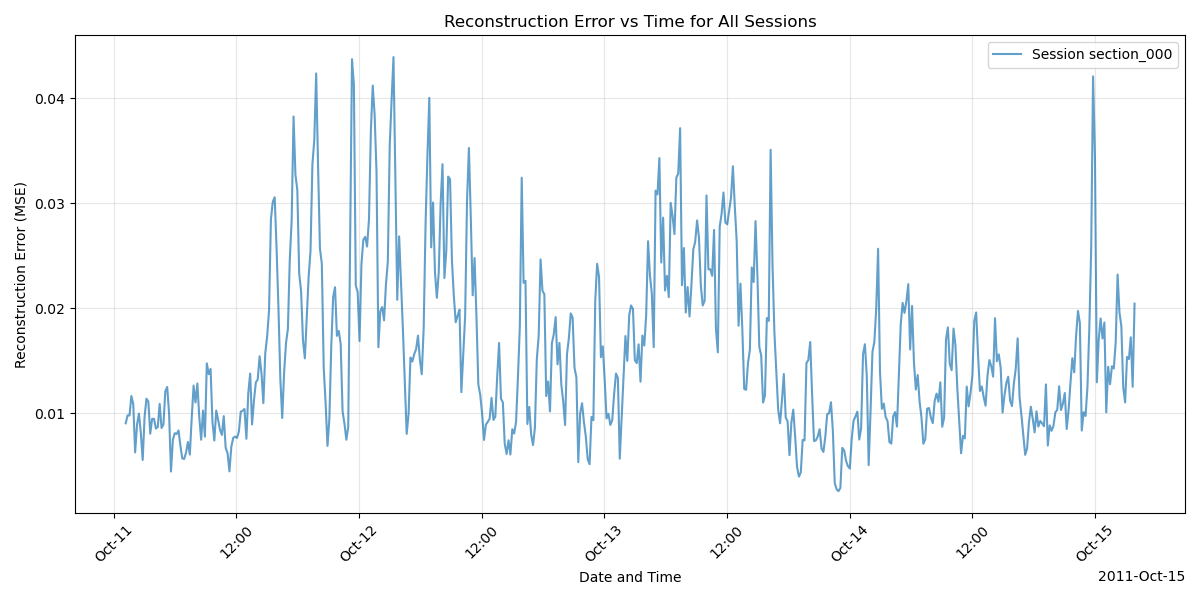

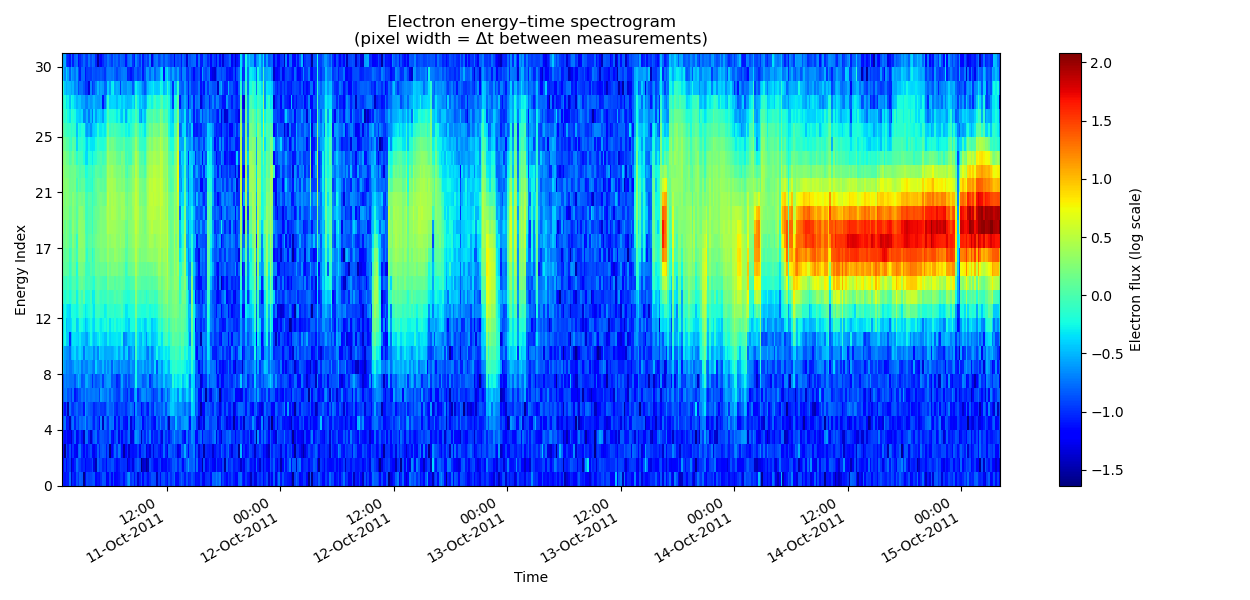

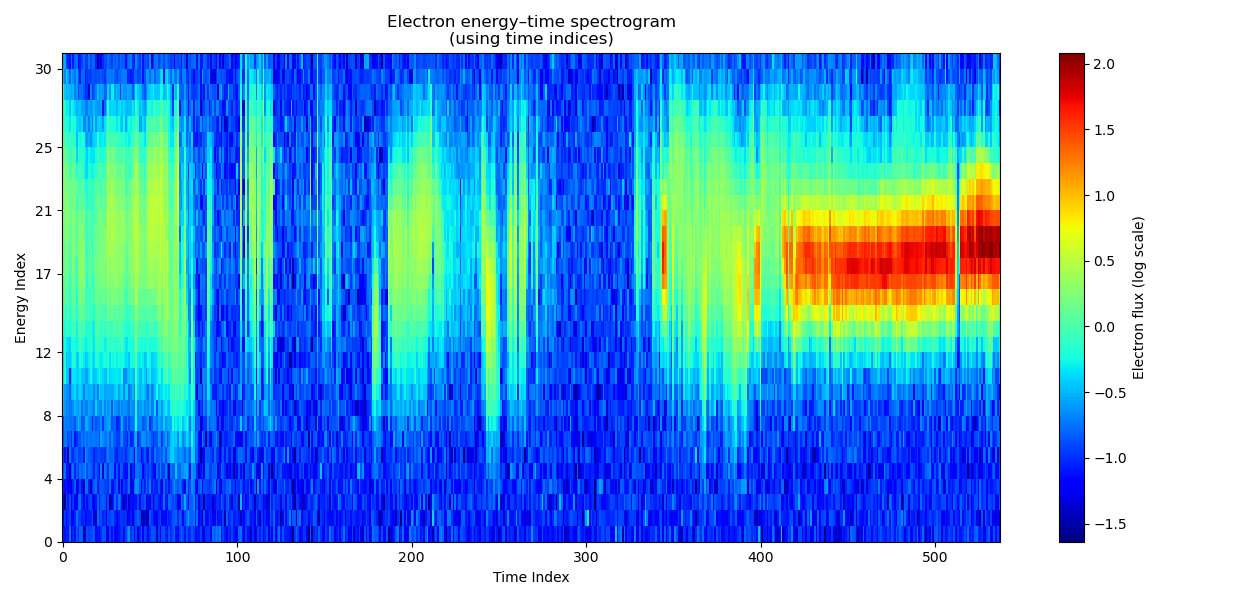

In [341]:
autoencoder.evaluate_reconstruction_error(testing_data, times=testing_data_full['section_000']['time'])
plot_electron_spectrogram(testing_data_dict['section_000']['B_ion_eflux'].numpy(), 
                          testing_data_full['section_000']['time'].numpy(),                           
                          figsize=(12.5, 6),
                          norm=None
                          )

plot_electron_spectrogram(testing_data_dict['section_000']['B_ion_eflux'].numpy(),                   
                          figsize=(12.5, 6),
                          norm=None
                          )

In [326]:
testing_data_full['section_000']['time'].shape

torch.Size([538])

In [327]:
testing_data['section_0000']['B_ion_eflux'].shape

KeyError: 'section_0000'